In [1]:
!pip install ultralytics roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GHQazgS1uvHTfLZttkdb")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 132.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Workers-1 in yolov8:: 100%|██████████| 14079/14079 [00:01<00:00, 8829.37it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os
import yaml

dataset_root = '/content/Hard-Hat-Workers-1'

found_train = None
found_val = None

if os.path.exists(os.path.join(dataset_root, 'train/images')):
    found_train = os.path.join(dataset_root, 'train/images')

for folder_name in ['valid', 'val', 'test']:
    path = os.path.join(dataset_root, folder_name, 'images')
    if os.path.exists(path):
        found_val = path
        break

if found_train and found_val:
    print(f"✅ Found Train: {found_train}")
    print(f"✅ Found Val:   {found_val}")

    yaml_path = os.path.join(dataset_root, 'data.yaml')

    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)

    data['train'] = found_train
    data['val'] = found_val

    with open(yaml_path, 'w') as f:
        yaml.dump(data, f)

    print("SUCCESS: data.yaml has been fixed!")

else:
    print("ERROR: Could not find image folders. Please check the file list below:")
    print(os.listdir(dataset_root))

✅ Found Train: /content/Hard-Hat-Workers-1/train/images
✅ Found Val:   /content/Hard-Hat-Workers-1/test/images
SUCCESS: data.yaml has been fixed!


In [4]:
from google.colab import drive
from ultralytics import YOLO

drive.mount('/content/drive')

model = YOLO('yolov8n.pt')

results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=25,
    imgsz=640,
    project='/content/drive/MyDrive/Helmet_Project',
    name='run_1',
    exist_ok=True
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hard-Hat-Workers-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=r


image 1/1 /content/Hard-Hat-Workers-1/test/images/006090_jpg.rf.e27c006b593ad242e5e4577e05f81206.jpg: 640x640 4 helmets, 8.7ms
Speed: 3.2ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3


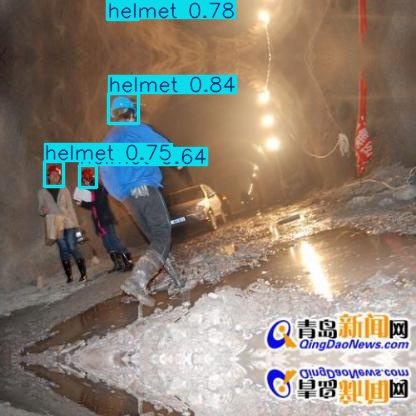

In [7]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display

model_path = '/content/drive/MyDrive/Helmet_Project/run_1/weights/best.pt'
model = YOLO(model_path)

test_images = glob.glob(f"{dataset.location}/test/images/*.jpg")
results = model.predict(test_images[0], save=True, conf=0.5)

import os

latest_run = max(glob.glob('/content/runs/detect/predict*'), key=os.path.getmtime)
saved_image = os.path.join(latest_run, os.path.basename(test_images[0]))

display(Image(saved_image))

In [8]:

results = model.predict(test_images[0], conf=0.5)

print("\n--- 🏗️ SITE SAFETY REPORT ---")
for result in results:
    names = result.names
    classes = result.boxes.cls.cpu().numpy()

    violation_count = 0
    safe_workers = 0

    for cls_id in classes:
        class_name = names[int(cls_id)]

        if class_name == 'head':
            violation_count += 1
        elif class_name == 'helmet':
            safe_workers += 1

    if violation_count > 0:
        print(f"🚨 ALARM: {violation_count} worker(s) detected without helmets!")
        print("Action: Logging incident and notifying supervisor.")
    else:
        print(f"✅ STATUS: All {safe_workers} workers are compliant.")


image 1/1 /content/Hard-Hat-Workers-1/test/images/006090_jpg.rf.e27c006b593ad242e5e4577e05f81206.jpg: 640x640 4 helmets, 10.7ms
Speed: 3.5ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

--- 🏗️ SITE SAFETY REPORT ---
✅ STATUS: All 4 workers are compliant.


In [9]:

results = model.predict("young-handsome-indian-man-construction-worker-holding-safety-helmet-red-rose-ready-valentine-s-day-studio-shot-young-191080303.webp", conf=0.5)

for result in results:
    names = result.names
    classes = result.boxes.cls.cpu().numpy()

    violation_count = 0
    safe_workers = 0

    for cls_id in classes:
        class_name = names[int(cls_id)]

        if class_name == 'head':
            violation_count += 1
        elif class_name == 'helmet':
            safe_workers += 1

    if violation_count > 0:
        print(f"🚨 ALARM: {violation_count} worker(s) detected without helmets!")
        print("Action: Logging incident and notifying supervisor.")
    else:
        print(f"✅ STATUS: All {safe_workers} workers are compliant.")


image 1/1 /content/young-handsome-indian-man-construction-worker-holding-safety-helmet-red-rose-ready-valentine-s-day-studio-shot-young-191080303.webp: 448x640 1 head, 71.2ms
Speed: 6.9ms preprocess, 71.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
🚨 ALARM: 1 worker(s) detected without helmets!
Action: Logging incident and notifying supervisor.


In [13]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import datetime
import pytz

ist_zone = pytz.timezone('Asia/Kolkata')


def send_safety_alert(violation_count, image_path):

    timestamp = datetime.datetime.now(ist_zone).strftime("%Y-%m-%d %H:%M:%S")

    print("\n" + "="*40)
    print(f"🚀 AGENT ACTIVATED at {timestamp}")
    print(f"📧 SENDING EMAIL TO: supervisor@construction-site.com")
    print(f"🚨 SUBJECT: URGENT - {violation_count} Safety Violations Detected")
    print(f"📎 ATTACHMENT: {image_path}")
    print(f"📝 BODY: Automated Alert. Please inspect Sector 4 immediately.")
    print("="*40 + "\n")

    return True


image_file = "young-handsome-indian-man-construction-worker-holding-safety-helmet-red-rose-ready-valentine-s-day-studio-shot-young-191080303.webp"
results = model.predict(image_file, conf=0.5)

for result in results:
    classes = result.boxes.cls.cpu().numpy()
    names = result.names

    violation_count = 0
    for cls_id in classes:
        if names[int(cls_id)] == 'head':
            violation_count += 1

    if violation_count > 0:
        print(f"❌ VIOLATION FOUND. Triggering Agent...")
        send_safety_alert(violation_count, image_file)
    else:
        print(f"✅ All clear. Agent sleeping.")


image 1/1 /content/young-handsome-indian-man-construction-worker-holding-safety-helmet-red-rose-ready-valentine-s-day-studio-shot-young-191080303.webp: 448x640 1 head, 40.0ms
Speed: 7.8ms preprocess, 40.0ms inference, 8.3ms postprocess per image at shape (1, 3, 448, 640)
❌ VIOLATION FOUND. Triggering Agent...

🚀 AGENT ACTIVATED at 2026-01-13 13:58:37
📧 SENDING EMAIL TO: supervisor@construction-site.com
🚨 SUBJECT: URGENT - 1 Safety Violations Detected
📎 ATTACHMENT: young-handsome-indian-man-construction-worker-holding-safety-helmet-red-rose-ready-valentine-s-day-studio-shot-young-191080303.webp
📝 BODY: Automated Alert. Please inspect Sector 4 immediately.



In [14]:
from google.colab import files

files.download('/content/drive/MyDrive/Helmet_Project/run_1/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>